In [11]:
import torch
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y = weight * X + bias


In [12]:
train_split = int(0.8 * len(X))

X_train, Y_train = X[: train_split], Y[: train_split]
X_test, Y_test = X[train_split :], Y[train_split :]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [13]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training Data")
  plt.scatter(test_data, test_labels, c = "g", s= 4, label = "Testing Data",)
  if predictions is not None:
    plt.scatter(X_test, predictions, c = "r", s=4, label = "Predictions")
  plt.legend({"size" : 14})


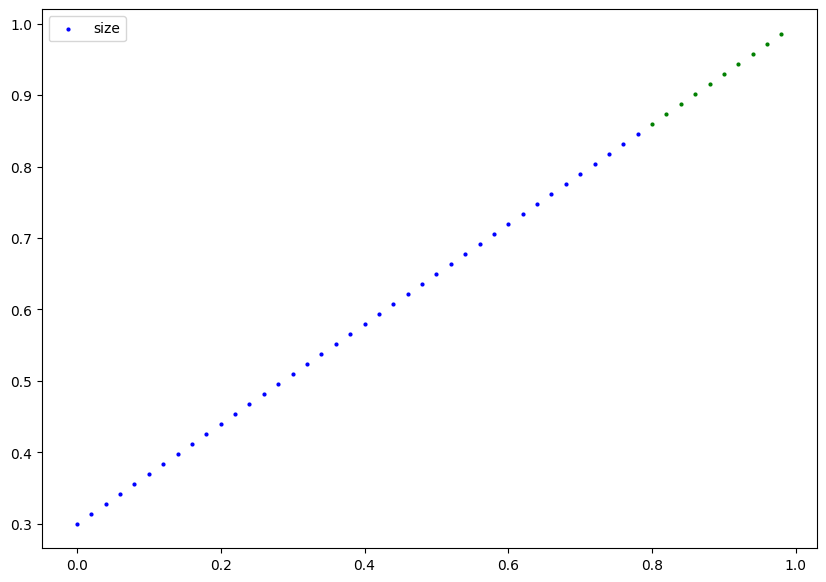

In [14]:
plot_predictions()

In [23]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [24]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [25]:
with torch.inference_mode():
  y_preds = model_0(X_test)

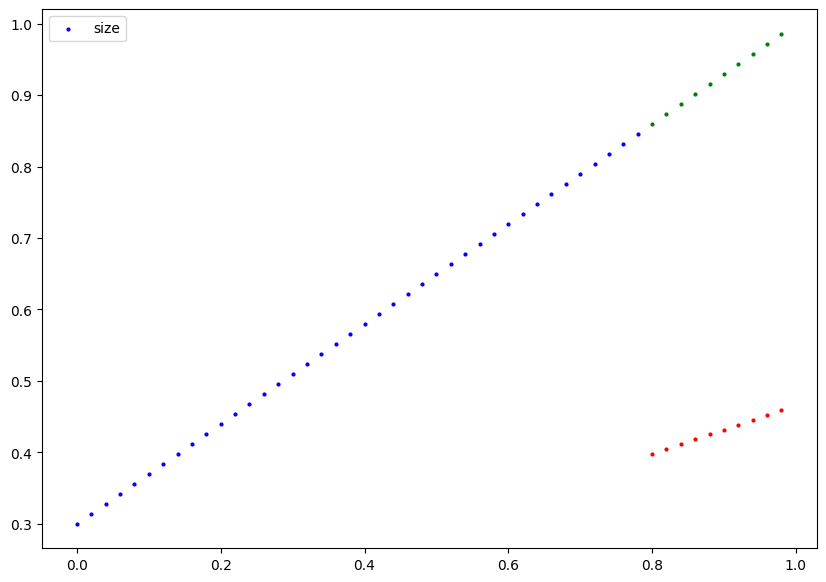

In [26]:
plot_predictions(predictions=y_preds)

In [28]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [35]:
torch.manual_seed(42)
epochs = 1000000
for epoch in range(epochs):
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

In [36]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

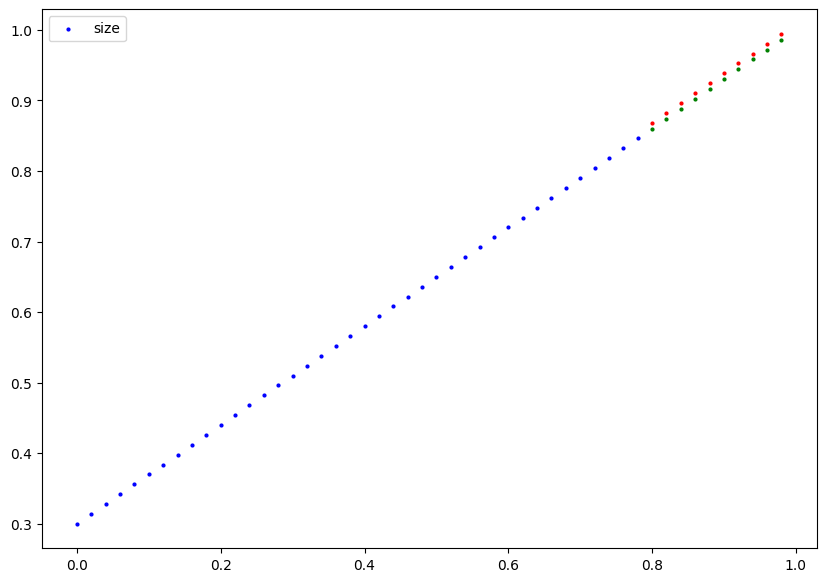

In [37]:
plot_predictions(predictions=y_preds_new)